In [1]:
"""
Example: Load ensemble files (with a member dimension), subset, and prepare grids.
"""
import sys
import os


sys.path.append(os.path.abspath(".."))
from scripts.ensemble_loader import load_ensemble_files
from scripts.subsetting import subset_by_lat_lon, subset_time
from scripts.utils import prepare_ensemble_grid, prepare_reference_grid
import xarray as xr

# --- Example File Pattern ---
# Adjust the file pattern to match your ensemble file locations.
ensemble_pattern = os.path.join("../data", "total_precipitation_2017*.nc")
chunks = {'time': 1, 'lat': 100, 'lon': 100}  # Example chunking for large files

# --- Load the ensemble files ---
ds_ensemble = load_ensemble_files(ensemble_pattern, chunks=None)


print(ds_ensemble)


<xarray.Dataset> Size: 2GB
Dimensions:        (time: 48, member: 10, lat: 492, lon: 594)
Coordinates:
  * member         (member) object 80B '00' '01' '02' '03' ... '07' '08' '09'
  * time           (time) datetime64[ns] 384B 2017-10-01 ... 2017-10-02T23:00:00
Dimensions without coordinates: lat, lon
Data variables:
    latitude       (time, lat, lon, member) float32 561MB 42.98 42.98 ... 51.82
    longitude      (time, lat, lon, member) float32 561MB 5.498 5.498 ... 22.1
    precipitation  (time, lat, lon, member) float64 1GB 0.0 0.0 0.0 ... 0.0 0.0


In [2]:
# (Assuming the ensemble files have spatial dimensions named 'lat' and 'lon'
#  and the geographic information is stored as 2D data variables 'latitude' and 'longitude')
# For this example, we subset the ensemble data in space and time:
lat_bounds = (46, 48)
lon_bounds = (10, 13)
start_time = "2017-10-01T00:00:00"
end_time   = "2017-10-02T23:00:00"

# Subset in space using the data variables ('latitude', 'longitude')
ds_ens_subset = subset_by_lat_lon(ds_ensemble, (46, 48), (10, 13), lat_var='latitude', lon_var='longitude')
ds_ens_subset = subset_time(ds_ens_subset, start_time, end_time)

print(ds_ens_subset)

<xarray.Dataset> Size: 91MB
Dimensions:        (time: 48, lat: 111, lon: 107, member: 10)
Coordinates:
  * member         (member) object 80B '00' '01' '02' '03' ... '07' '08' '09'
  * time           (time) datetime64[ns] 384B 2017-10-01 ... 2017-10-02T23:00:00
Dimensions without coordinates: lat, lon
Data variables:
    latitude       (time, lat, lon, member) float32 23MB 46.01 46.01 ... 47.99
    longitude      (time, lat, lon, member) float32 23MB 10.01 10.01 ... 12.97
    precipitation  (time, lat, lon, member) float64 46MB 0.668 0.9192 ... 1.655


In [3]:
# Prepare the ensemble grid (extract 1D coordinates, swap dims)
ds_ens_prepared = prepare_ensemble_grid(ds_ens_subset, lat_var='latitude', lon_var='longitude')

# For demonstration, print the resulting dataset summary:
print("Prepared Ensemble Dataset:")
print(ds_ens_prepared)


Prepared Ensemble Dataset:
<xarray.Dataset> Size: 46MB
Dimensions:        (time: 48, lat_coord: 111, lon_coord: 107, member: 10)
Coordinates:
  * member         (member) object 80B '00' '01' '02' '03' ... '07' '08' '09'
  * time           (time) datetime64[ns] 384B 2017-10-01 ... 2017-10-02T23:00:00
  * lat_coord      (lat_coord) float32 444B 46.01 46.02 46.04 ... 47.97 47.99
  * lon_coord      (lon_coord) float32 428B 10.01 10.03 10.06 ... 12.95 12.97
Data variables:
    precipitation  (time, lat_coord, lon_coord, member) float64 46MB 0.668 .....


In [4]:
ref_file = os.path.join("../data", "SPARTACUS2-DAILY_RR_201*.nc")

In [5]:
from scripts.utils import prepare_reference_grid
from scripts.data_loader import load_nc_files

In [6]:
ds_ref = load_nc_files(ref_file)
ds_ref

<xarray.Dataset> Size: 2GB
Dimensions:                  (time: 1096, y: 329, x: 584)
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (y, x) float32 769kB dask.array<chunksize=(329, 584), meta=np.ndarray>
    lon                      (y, x) float32 769kB dask.array<chunksize=(329, 584), meta=np.ndarray>
  * time                     (time) datetime64[ns] 9kB 2016-01-01 ... 2018-12-31
  * x                        (x) int32 2kB 112500 113500 ... 694500 695500
  * y                        (y) int32 1kB 258500 259500 ... 585500 586500
Data variables:
    RR                       (time, y, x) float64 2GB dask.array<chunksize=(122, 110, 195), meta=np.ndarray>
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              GeoSphere Austria (kontakt@geosphere.at)
    comment:             No additional comments
    crs:                 EPSG:3416
    freq:                1D
    grid_mapping:        lambert_conformal_conic
    ...                  ...
    name:                spartacus-daily v2.1
    references:          temperature - doi:10.1007/s00704-015-1411-4, precipi...
    source:              geostatistical interpolation of surface station obse...
    spatial_domain:      SPARTACUS
    spatial_resolution:  1000
    title:               SPARTACUS - Spatial Dataset for Climate in Austria

In [7]:
ds_ref_subset = subset_by_lat_lon(ds_ref, lat_bounds, lon_bounds)
ds_ref_subset_temp = subset_time(ds_ref_subset, start_time, end_time)

print(ds_ref_subset_temp)

<xarray.Dataset> Size: 1MB
Dimensions:                  (time: 2, y: 203, x: 232)
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (y, x) float32 188kB 46.18 46.18 ... 48.04 48.04
    lon                      (y, x) float32 188kB 10.01 10.02 ... 12.98 12.99
  * time                     (time) datetime64[ns] 16B 2017-10-01 2017-10-02
  * x                        (x) int32 928B 143500 144500 ... 373500 374500
  * y                        (y) int32 812B 258500 259500 ... 459500 460500
Data variables:
    RR                       (time, y, x) float64 754kB dask.array<chunksize=(2, 109, 232), meta=np.ndarray>
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              GeoSphere Austria (kontakt@geosphere.at)
    comment:             No additional comments
    crs:                 EPSG:3416
    freq:                1D
    grid_mapping:        lambert_conformal_conic
    ...                  ...
    name:                spartacus-daily v2.

(array([19699.,  5732.,  3527.,  1721.,  1462.,  1025.,   465.,   188.,
          108.,    41.]),
 array([ 0.  ,  2.14,  4.28,  6.42,  8.56, 10.7 , 12.84, 14.98, 17.12,
        19.26, 21.4 ]),
 <BarContainer object of 10 artists>)

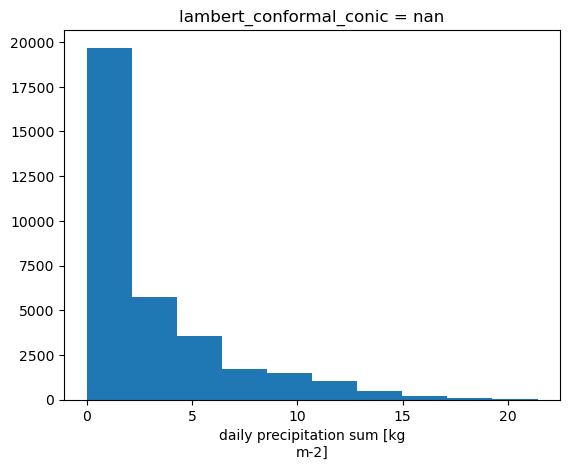

In [8]:
ds_ref_subset_temp['RR'].plot()

In [9]:
ref_file2 = os.path.join("../data", "INCA_RR_20171*.nc")
ds_ref2 = load_nc_files(ref_file2)
print(ds_ref2)

<xarray.Dataset> Size: 7GB
Dimensions:                  (time: 5856, y: 401, x: 701)
Coordinates:
  * time                     (time) datetime64[ns] 47kB 2017-10-01 ... 2017-1...
  * y                        (y) int32 2kB 220000 221000 ... 619000 620000
  * x                        (x) int32 3kB 20000 21000 22000 ... 719000 720000
    lat                      (y, x) float64 2MB dask.array<chunksize=(401, 701), meta=np.ndarray>
    lon                      (y, x) float64 2MB dask.array<chunksize=(401, 701), meta=np.ndarray>
Data variables:
    RR                       (time, y, x) float32 7GB dask.array<chunksize=(298, 41, 71), meta=np.ndarray>
    lambert_conformal_conic  (time) int32 23kB -2147483647 ... -2147483647
Attributes:
    provider:     ZAMG (Central Institution for Meteorology and Geodynamics A...
    title:        INCA (Integrated Nowcasting through Comprehensive Analysis)
    Conventions:  CF-1.5


In [10]:
ds_ref_subset2 = subset_by_lat_lon(ds_ref2, lat_bounds, lon_bounds)
ds_ref_subset_temp2 = subset_time(ds_ref_subset2, start_time, end_time)

print(ds_ref_subset_temp2)

<xarray.Dataset> Size: 121MB
Dimensions:                  (time: 189, y: 227, x: 234)
Coordinates:
  * time                     (time) datetime64[ns] 2kB 2017-10-01 ... 2017-10...
  * y                        (y) int32 908B 234000 235000 ... 459000 460000
  * x                        (x) int32 936B 142000 143000 ... 374000 375000
    lat                      (y, x) float64 425kB 45.96 45.96 ... 48.04 48.04
    lon                      (y, x) float64 425kB 10.0 10.02 ... 12.98 13.0
Data variables:
    RR                       (time, y, x) float32 40MB dask.array<chunksize=(189, 40, 70), meta=np.ndarray>
    lambert_conformal_conic  (time, y, x) float64 80MB nan nan nan ... nan nan
Attributes:
    provider:     ZAMG (Central Institution for Meteorology and Geodynamics A...
    title:        INCA (Integrated Nowcasting through Comprehensive Analysis)
    Conventions:  CF-1.5


In [10]:
from scripts.regridding import regrid_to_target
from scripts.utils import prepare_reference_grid

ds_ref_prepared = prepare_reference_grid(ds_ref_subset_temp2, lat_var='lat', lon_var='lon', 
                                         dim_lat='y', dim_lon='x')

# For testing, print a summary of the prepared reference dataset.
print("Prepared Reference Dataset:")
print(ds_ref_prepared)


Prepared Reference Dataset:
<xarray.Dataset> Size: 35MB
Dimensions:                  (time: 53, lat_coord: 227, lon_coord: 234)
Coordinates:
  * time                     (time) datetime64[ns] 424B 2017-10-01 ... 2017-1...
    lat_dim                  (lat_coord) int32 908B 234000 235000 ... 460000
    lon_dim                  (lon_coord) int32 936B 142000 143000 ... 375000
    lat                      (lat_coord, lon_coord) float64 425kB 45.96 ... 4...
    lon                      (lat_coord, lon_coord) float64 425kB 10.0 ... 13.0
  * lat_coord                (lat_coord) float64 2kB 45.96 45.97 ... 47.98 47.99
  * lon_coord                (lon_coord) float64 2kB 10.0 10.02 ... 13.0 13.01
Data variables:
    RR                       (time, lat_coord, lon_coord) float32 11MB dask.array<chunksize=(53, 40, 70), meta=np.ndarray>
    lambert_conformal_conic  (time, lat_coord, lon_coord) float64 23MB nan .....
Attributes:
    provider:     ZAMG (Central Institution for Meteorology and Geodyna

In [11]:
ds_ens_prepared.mean(dim="member")

<xarray.Dataset> Size: 1MB
Dimensions:        (time: 14, lat_coord: 111, lon_coord: 107)
Coordinates:
  * time           (time) datetime64[ns] 112B 2017-10-01 ... 2017-10-01T13:00:00
  * lat_coord      (lat_coord) float32 444B 46.01 46.02 46.04 ... 47.97 47.99
  * lon_coord      (lon_coord) float32 428B 10.01 10.03 10.06 ... 12.95 12.97
Data variables:
    precipitation  (time, lat_coord, lon_coord) float64 1MB 0.6526 ... 0.07052

In [36]:
# Regrid the ensemble precipitation onto the reference grid.
ens_precip_interp = regrid_to_target(ds_ens_prepared, ds_ref_prepared)

# Optionally, you can inspect the result:
print("Ensemble Precipitation Interpolated onto the Reference Grid:")
print(ens_precip_interp)


Ensemble Precipitation Interpolated onto the Reference Grid:
<xarray.Dataset> Size: 204MB
Dimensions:        (time: 48, lat_coord: 227, lon_coord: 234, member: 10)
Coordinates:
  * member         (member) object 80B '00' '01' '02' '03' ... '07' '08' '09'
  * time           (time) datetime64[ns] 384B 2017-10-01 ... 2017-10-02T23:00:00
  * lat_coord      (lat_coord) float64 2kB 45.96 45.97 45.97 ... 47.98 47.99
  * lon_coord      (lon_coord) float64 2kB 10.0 10.02 10.03 ... 12.98 13.0 13.01
    lat_dim        (lat_coord) int32 908B 234000 235000 236000 ... 459000 460000
    lon_dim        (lon_coord) int32 936B 142000 143000 144000 ... 374000 375000
Data variables:
    precipitation  (time, lat_coord, lon_coord, member) float64 204MB nan ......


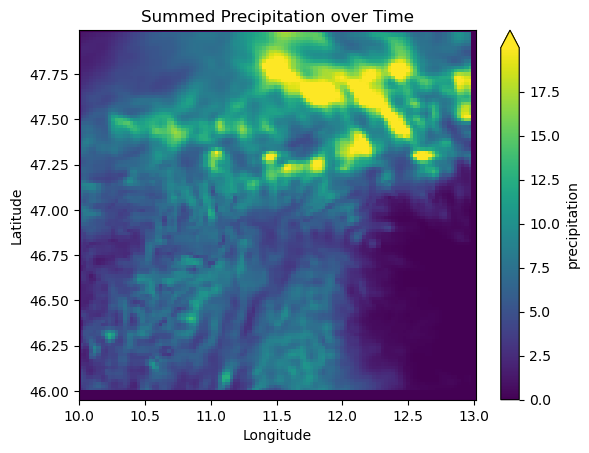

In [13]:
import matplotlib.pyplot as plt
sum_precip = ens_precip_interp['precipitation'].sel(member='08').sum(dim='time')
sum_precip.plot(cmap='viridis', robust=True)
plt.title("Summed Precipitation over Time")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

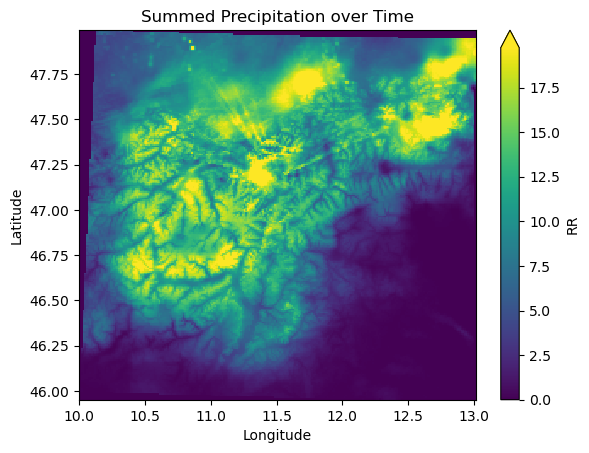

In [14]:
sum_precip1 = ds_ref_prepared['RR'].sum(dim='time')
sum_precip1.plot(cmap='viridis', robust=True)
plt.title("Summed Precipitation over Time")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

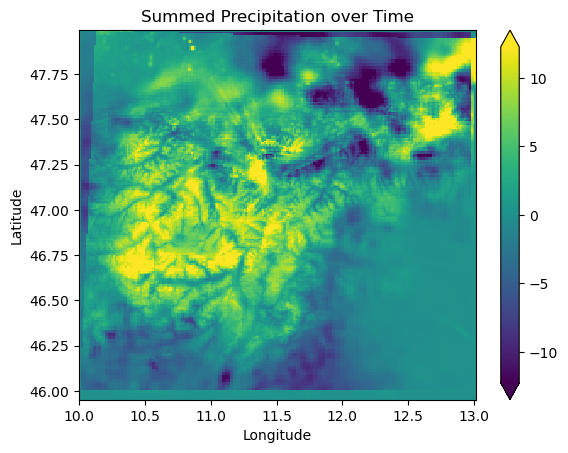

In [15]:
diff = sum_precip1 - sum_precip

diff.plot(cmap='viridis', robust=True)
plt.title("Summed Precipitation over Time")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [16]:
from scripts.temporal_stats import aggregate_to_daily, aggregate_by_month, aggregate_by_season, aggregate_by_year

In [18]:
daily_ens = aggregate_to_daily(ens_precip_interp, "precipitation", method="sum", missing_value=None, compute_ens_mean=False)

print(daily_ens)

<xarray.DataArray 'precipitation' (time: 1, lat_coord: 227, lon_coord: 234,
                                   member: 10)> Size: 4MB
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
   

In [19]:
ref_file_spa = os.path.join("../data", "SPARTACUS2-DAILY_RR_201*.nc")

ds_ref_spa = load_nc_files(ref_file_spa)

ds_ref_subset_spa = subset_by_lat_lon(ds_ref_spa, lat_bounds, lon_bounds)
ds_ref_subset_temp_spa = subset_time(ds_ref_subset_spa, '2017-01-01', '2018-01-01')

print(ds_ref_subset_temp_spa)

<xarray.Dataset> Size: 138MB
Dimensions:                  (time: 366, y: 203, x: 232)
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (y, x) float32 188kB 46.18 46.18 ... 48.04 48.04
    lon                      (y, x) float32 188kB 10.01 10.02 ... 12.98 12.99
  * time                     (time) datetime64[ns] 3kB 2017-01-01 ... 2018-01-01
  * x                        (x) int32 928B 143500 144500 ... 373500 374500
  * y                        (y) int32 812B 258500 259500 ... 459500 460500
Data variables:
    RR                       (time, y, x) float64 138MB dask.array<chunksize=(122, 109, 232), meta=np.ndarray>
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              GeoSphere Austria (kontakt@geosphere.at)
    comment:             No additional comments
    crs:                 EPSG:3416
    freq:                1D
    grid_mapping:        lambert_conformal_conic
    ...                  ...
    name:                spartacus

In [20]:
ds_ref_prepared_spa = prepare_reference_grid(ds_ref_subset_temp_spa, lat_var='lat', lon_var='lon', 
                                         dim_lat='y', dim_lon='x')
print(ds_ref_prepared_spa)

<xarray.Dataset> Size: 138MB
Dimensions:                  (time: 366, lat_coord: 203, lon_coord: 232)
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (lat_coord, lon_coord) float32 188kB 46.18 ... 4...
    lon                      (lat_coord, lon_coord) float32 188kB 10.01 ... 1...
  * time                     (time) datetime64[ns] 3kB 2017-01-01 ... 2018-01-01
    lon_dim                  (lon_coord) int32 928B 143500 144500 ... 374500
    lat_dim                  (lat_coord) int32 812B 258500 259500 ... 460500
  * lat_coord                (lat_coord) float32 812B 46.18 46.19 ... 47.99
  * lon_coord                (lon_coord) float32 928B 10.01 10.02 ... 12.99 13.0
Data variables:
    RR                       (time, lat_coord, lon_coord) float64 138MB dask.array<chunksize=(122, 109, 232), meta=np.ndarray>
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              GeoSphere Austria (kontakt@geosphere.at)
    comment:             N

In [22]:
monthly_ref_spa = aggregate_by_month(ds_ref_prepared_spa, 'RR', method="sum", missing_value=None)

monthly_ref_spa

/home/lar/anaconda3/envs/ara_env/lib/python3.13/site-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<xarray.DataArray 'RR' (time: 13, lat_coord: 203, lon_coord: 232)> Size: 5MB
dask.array<stack, shape=(13, 203, 232), dtype=float64, chunksize=(1, 109, 232), chunktype=numpy.ndarray>
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (lat_coord, lon_coord) float32 188kB 46.18 ... 4...
    lon                      (lat_coord, lon_coord) float32 188kB 10.01 ... 1...
    lon_dim                  (lon_coord) int32 928B 143500 144500 ... 374500
    lat_dim                  (lat_coord) int32 812B 258500 259500 ... 460500
  * lat_coord                (lat_coord) float32 812B 46.18 46.19 ... 47.99
  * lon_coord                (lon_coord) float32 928B 10.01 10.02 ... 12.99 13.0
  * time                     (time) datetime64[ns] 104B 2017-01-31 ... 2018-0...
Attributes:
    cell_method:     time: sum (7:00 CET to 7:00 CET day+1)
    description:     daily sum (derived from daily sums measured by climatolo...
    esri_pe_string:  PROJCS["ETRS89 / Austria Lambert",GEOGCS["ETRS89",DATUM[...
    grid_mapping:    lambert_conformal_conic
    long_name:       daily precipitation sum
    standard_name:   precipitation_amount
    units:           kg m-2

In [33]:
ref_file_inc = os.path.join("../data", "INCA_RR_20171*.nc")

ds_ref_inc = load_nc_files(ref_file_inc)

ds_ref_subset_inc = subset_by_lat_lon(ds_ref_inc, lat_bounds, lon_bounds)
ds_ref_subset_temp_inc = subset_time(ds_ref_subset_inc, '2017-10-01', '2017-10-02')

ds_ref_subset_temp_inc

<xarray.Dataset> Size: 123MB
Dimensions:                  (time: 192, y: 227, x: 234)
Coordinates:
  * time                     (time) datetime64[ns] 2kB 2017-10-01 ... 2017-10...
  * y                        (y) int32 908B 234000 235000 ... 459000 460000
  * x                        (x) int32 936B 142000 143000 ... 374000 375000
    lat                      (y, x) float64 425kB 45.96 45.96 ... 48.04 48.04
    lon                      (y, x) float64 425kB 10.0 10.02 ... 12.98 13.0
Data variables:
    RR                       (time, y, x) float32 41MB dask.array<chunksize=(192, 40, 70), meta=np.ndarray>
    lambert_conformal_conic  (time, y, x) float64 82MB nan nan nan ... nan nan
Attributes:
    provider:     ZAMG (Central Institution for Meteorology and Geodynamics A...
    title:        INCA (Integrated Nowcasting through Comprehensive Analysis)
    Conventions:  CF-1.5

In [34]:
ds_ref_prepared_inc = prepare_reference_grid(ds_ref_subset_temp_inc, lat_var='lat', lon_var='lon', 
                                         dim_lat='y', dim_lon='x')
ds_ref_prepared_inc

<xarray.Dataset> Size: 123MB
Dimensions:                  (time: 192, lat_coord: 227, lon_coord: 234)
Coordinates:
  * time                     (time) datetime64[ns] 2kB 2017-10-01 ... 2017-10...
    lat_dim                  (lat_coord) int32 908B 234000 235000 ... 460000
    lon_dim                  (lon_coord) int32 936B 142000 143000 ... 375000
    lat                      (lat_coord, lon_coord) float64 425kB 45.96 ... 4...
    lon                      (lat_coord, lon_coord) float64 425kB 10.0 ... 13.0
  * lat_coord                (lat_coord) float64 2kB 45.96 45.97 ... 47.98 47.99
  * lon_coord                (lon_coord) float64 2kB 10.0 10.02 ... 13.0 13.01
Data variables:
    RR                       (time, lat_coord, lon_coord) float32 41MB dask.array<chunksize=(192, 40, 70), meta=np.ndarray>
    lambert_conformal_conic  (time, lat_coord, lon_coord) float64 82MB nan .....
Attributes:
    provider:     ZAMG (Central Institution for Meteorology and Geodynamics A...
    title:        INCA (Integrated Nowcasting through Comprehensive Analysis)
    Conventions:  CF-1.5

In [35]:
daily_inc = aggregate_to_daily(ds_ref_prepared_inc, "RR", method="sum", missing_value=-999)

print(daily_inc)

<xarray.DataArray 'RR' (time: 2, lat_coord: 227, lon_coord: 234)> Size: 425kB
dask.array<stack, shape=(2, 227, 234), dtype=float32, chunksize=(1, 40, 70), chunktype=numpy.ndarray>
Coordinates:
    lat_dim    (lat_coord) int32 908B 234000 235000 236000 ... 459000 460000
    lon_dim    (lon_coord) int32 936B 142000 143000 144000 ... 374000 375000
    lat        (lat_coord, lon_coord) float64 425kB 45.96 45.96 ... 48.04 48.04
    lon        (lat_coord, lon_coord) float64 425kB 10.0 10.02 ... 12.98 13.0
  * lat_coord  (lat_coord) float64 2kB 45.96 45.97 45.97 ... 47.97 47.98 47.99
  * lon_coord  (lon_coord) float64 2kB 10.0 10.02 10.03 ... 12.98 13.0 13.01
  * time       (time) datetime64[ns] 16B 2017-10-01 2017-10-02
Attributes:
    standard_name:  precipitation_amount
    long_name:      Precipitation
    units:          mm
    grid_mapping:   lambert_conformal_conic


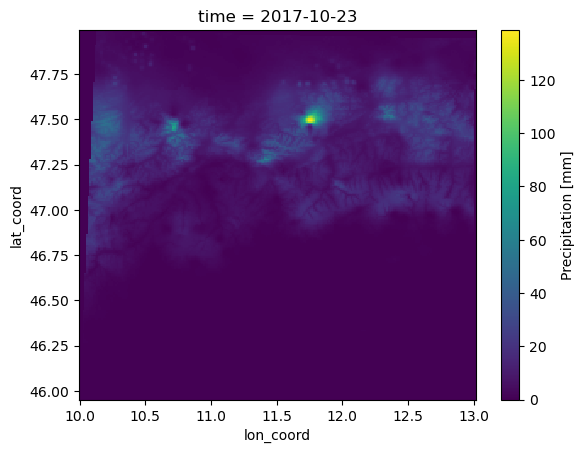

In [29]:
daily_inc.sel(time='2017-10-23').plot()

In [30]:
from scripts.bias_metrics import mean_error, mean_absolute_error, root_mean_squared_error

In [37]:
daily_ens_trial = aggregate_to_daily(ens_precip_interp, "precipitation", method="sum", missing_value=None, compute_ens_mean=False)

daily_ens_trial

<xarray.DataArray 'precipitation' (time: 2, lat_coord: 227, lon_coord: 234,
                                   member: 10)> Size: 8MB
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
...
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], shape=(2, 227, 234, 10))
Coordinates:
  * member     (member) object 80B '00' '01' '02' '03' ... '06' '07' '08' '09'
  * lat_coord  (lat_coord) float64 2kB 45.96 45.97 45.97 ... 47.97 47.98 47.99
  * lon_coord  (lon_coord) float64 2kB 10.0 10.02 10.03 ... 12.98 13.0 13.01
    lat_dim    (lat_coord) int32 908B 234000 235000 236000 ... 459000 460000
    lon_dim    (lon_coord) int32 936B 142000 143000 144000 ... 374000 375000
  * time       (time) datetime64[ns] 16B 2017-10-01 2017-10-02
Attributes:
    units:          mm
    standard_name:  precipitation amount

In [40]:
rmse_map = root_mean_squared_error(daily_ens_trial, daily_inc, dim="time")

rmse_map

<xarray.DataArray (lat_coord: 227, lon_coord: 234, member: 10)> Size: 4MB
dask.array<pow, shape=(227, 234, 10), dtype=float64, chunksize=(40, 70, 10), chunktype=numpy.ndarray>
Coordinates:
  * member     (member) object 80B '00' '01' '02' '03' ... '06' '07' '08' '09'
  * lat_coord  (lat_coord) float64 2kB 45.96 45.97 45.97 ... 47.97 47.98 47.99
  * lon_coord  (lon_coord) float64 2kB 10.0 10.02 10.03 ... 12.98 13.0 13.01
    lat_dim    (lat_coord) int32 908B 234000 235000 236000 ... 459000 460000
    lon_dim    (lon_coord) int32 936B 142000 143000 144000 ... 374000 375000
    lat        (lat_coord, lon_coord) float64 425kB 45.96 45.96 ... 48.04 48.04
    lon        (lat_coord, lon_coord) float64 425kB 10.0 10.02 ... 12.98 13.0

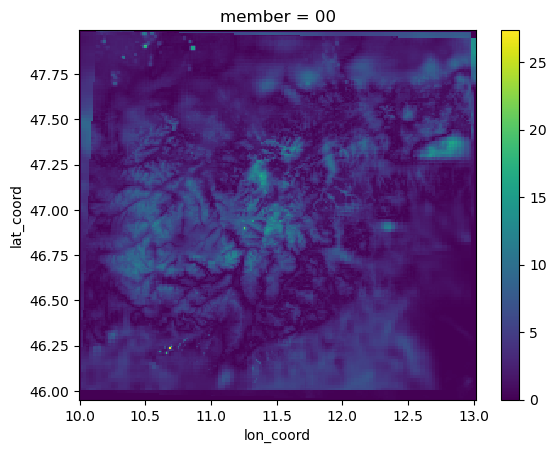

In [41]:
rmse_map.sel(member='00').plot()

In [42]:
me_member = mean_error(daily_ens_trial, daily_inc, dim=["time", "lat_coord", "lon_coord"])

me_member

<xarray.DataArray (member: 10)> Size: 80B
dask.array<mean_agg-aggregate, shape=(10,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * member   (member) object 80B '00' '01' '02' '03' ... '06' '07' '08' '09'

In [46]:
print(me_member[1].values)

0.6978373170727077


In [48]:
mae_map_ensmean = mean_absolute_error(daily_ens_trial, daily_inc, dim=["time", "member"])

mae_map_ensmean

<xarray.DataArray (lat_coord: 227, lon_coord: 234)> Size: 425kB
dask.array<mean_agg-aggregate, shape=(227, 234), dtype=float64, chunksize=(40, 70), chunktype=numpy.ndarray>
Coordinates:
  * lat_coord  (lat_coord) float64 2kB 45.96 45.97 45.97 ... 47.97 47.98 47.99
  * lon_coord  (lon_coord) float64 2kB 10.0 10.02 10.03 ... 12.98 13.0 13.01
    lat_dim    (lat_coord) int32 908B 234000 235000 236000 ... 459000 460000
    lon_dim    (lon_coord) int32 936B 142000 143000 144000 ... 374000 375000
    lat        (lat_coord, lon_coord) float64 425kB 45.96 45.96 ... 48.04 48.04
    lon        (lat_coord, lon_coord) float64 425kB 10.0 10.02 ... 12.98 13.0

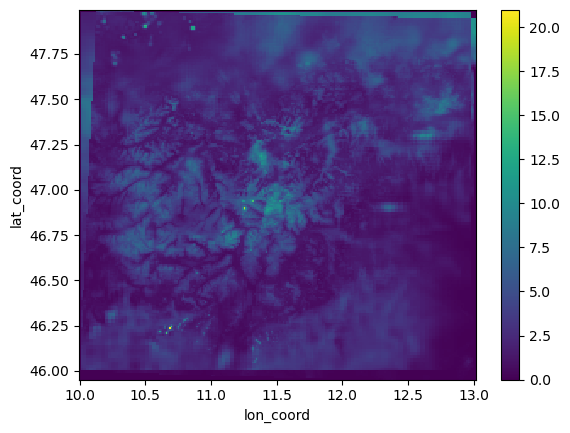

In [49]:
mae_map_ensmean.plot()